In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd   
df = pd.read_csv('/kaggle/input/titanic/train.csv')
df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

**How did i know about how many null values are their in DataFrame:**  

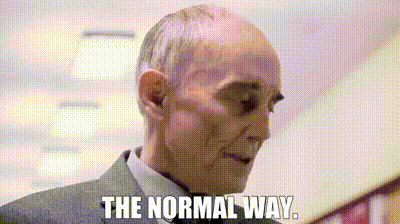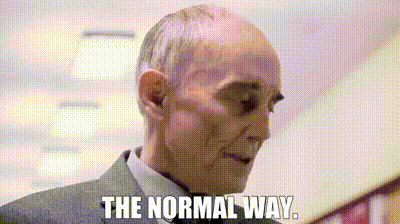

**Using Pandas **

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# import seaborn as sns    
# sns.countplot(df['Age'])

**Smart Way**


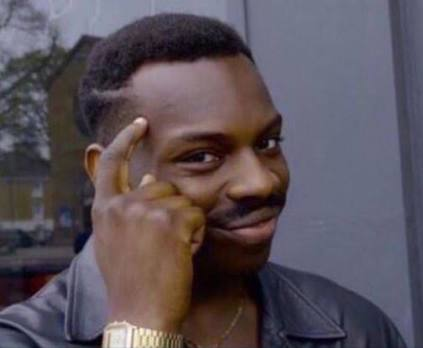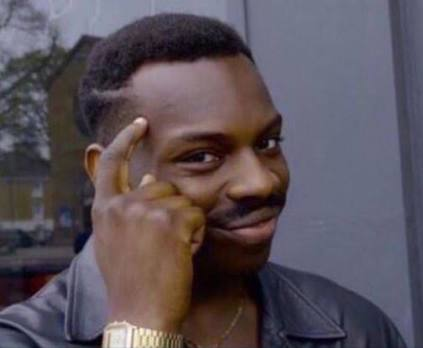

**Detecting missing data visually using Missingno library**¶



**To graphically analyse the missingness of the data, let's use a library called Missingno It is a package for graphical analysis of missing values. To use this library, we need to import it as follows: import missingno as msno**


In [9]:
!pip install Missingno

In [10]:
import missingno as msno


<Axes: >

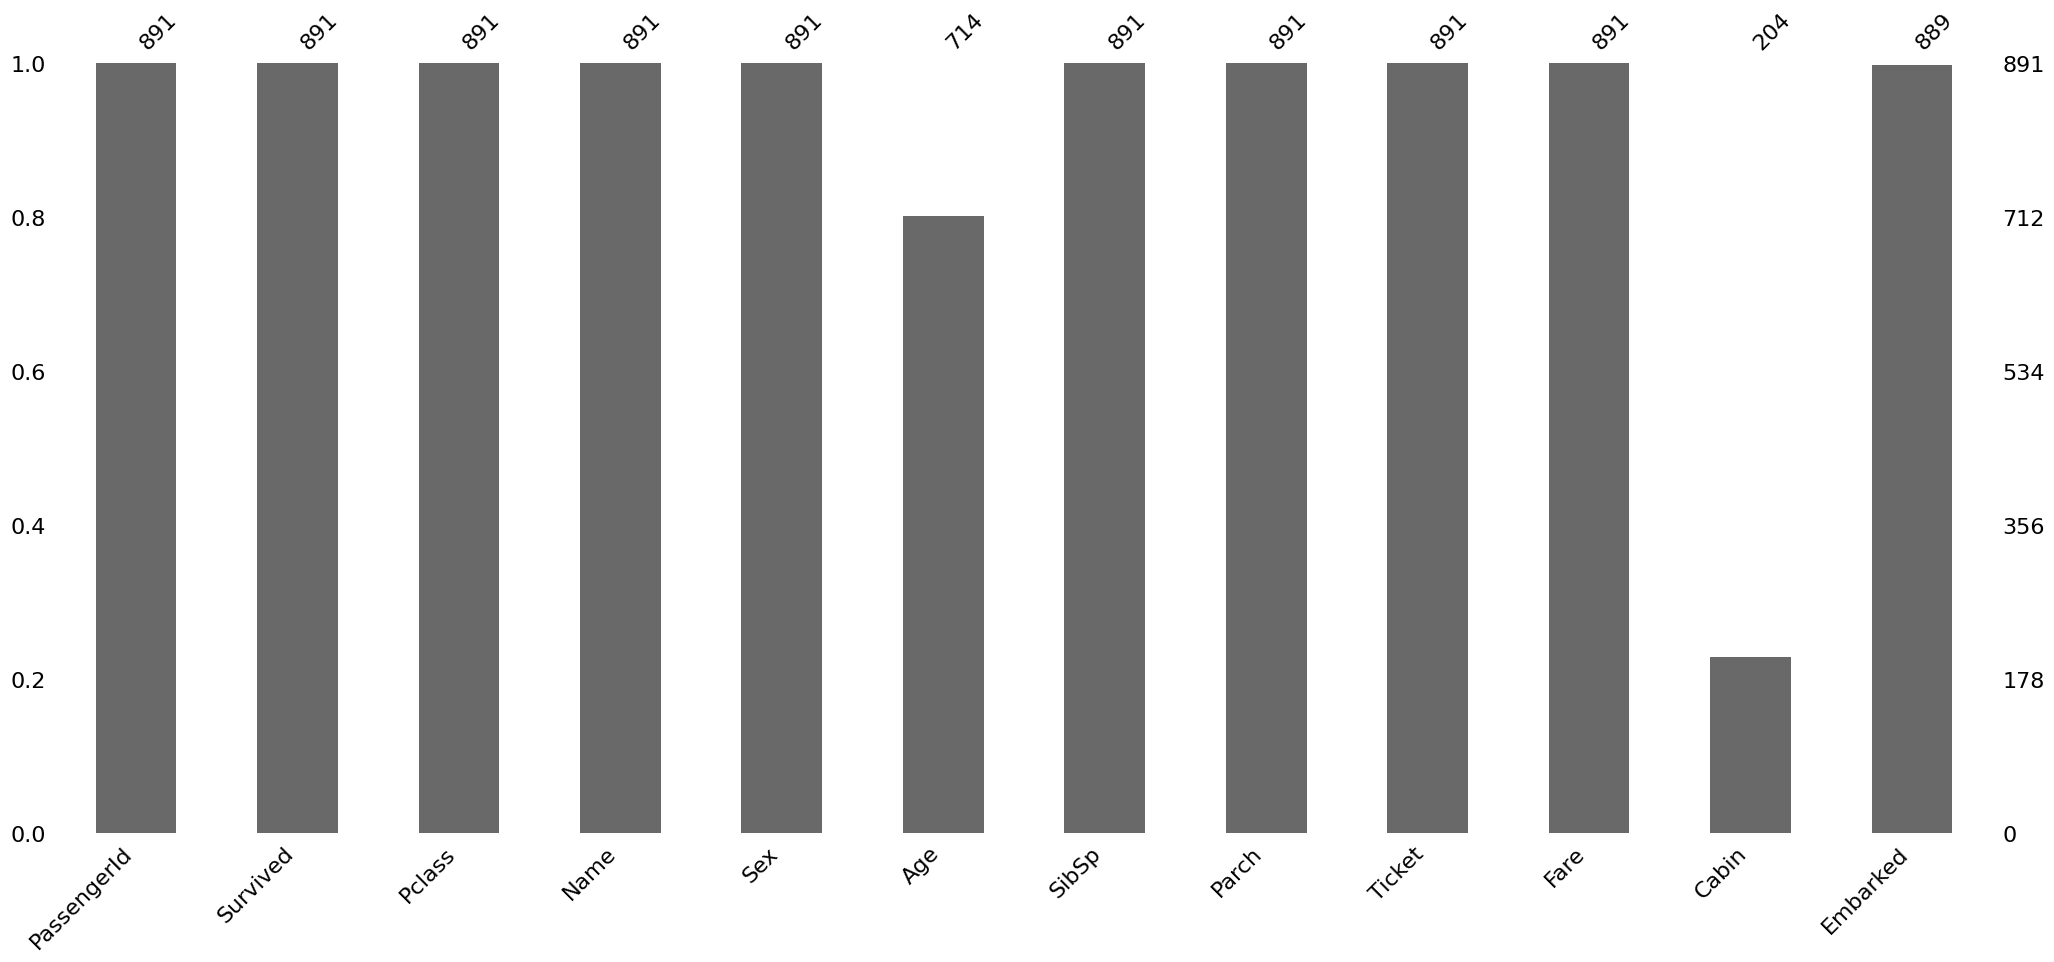

In [11]:
msno.bar(df)

<Axes: >

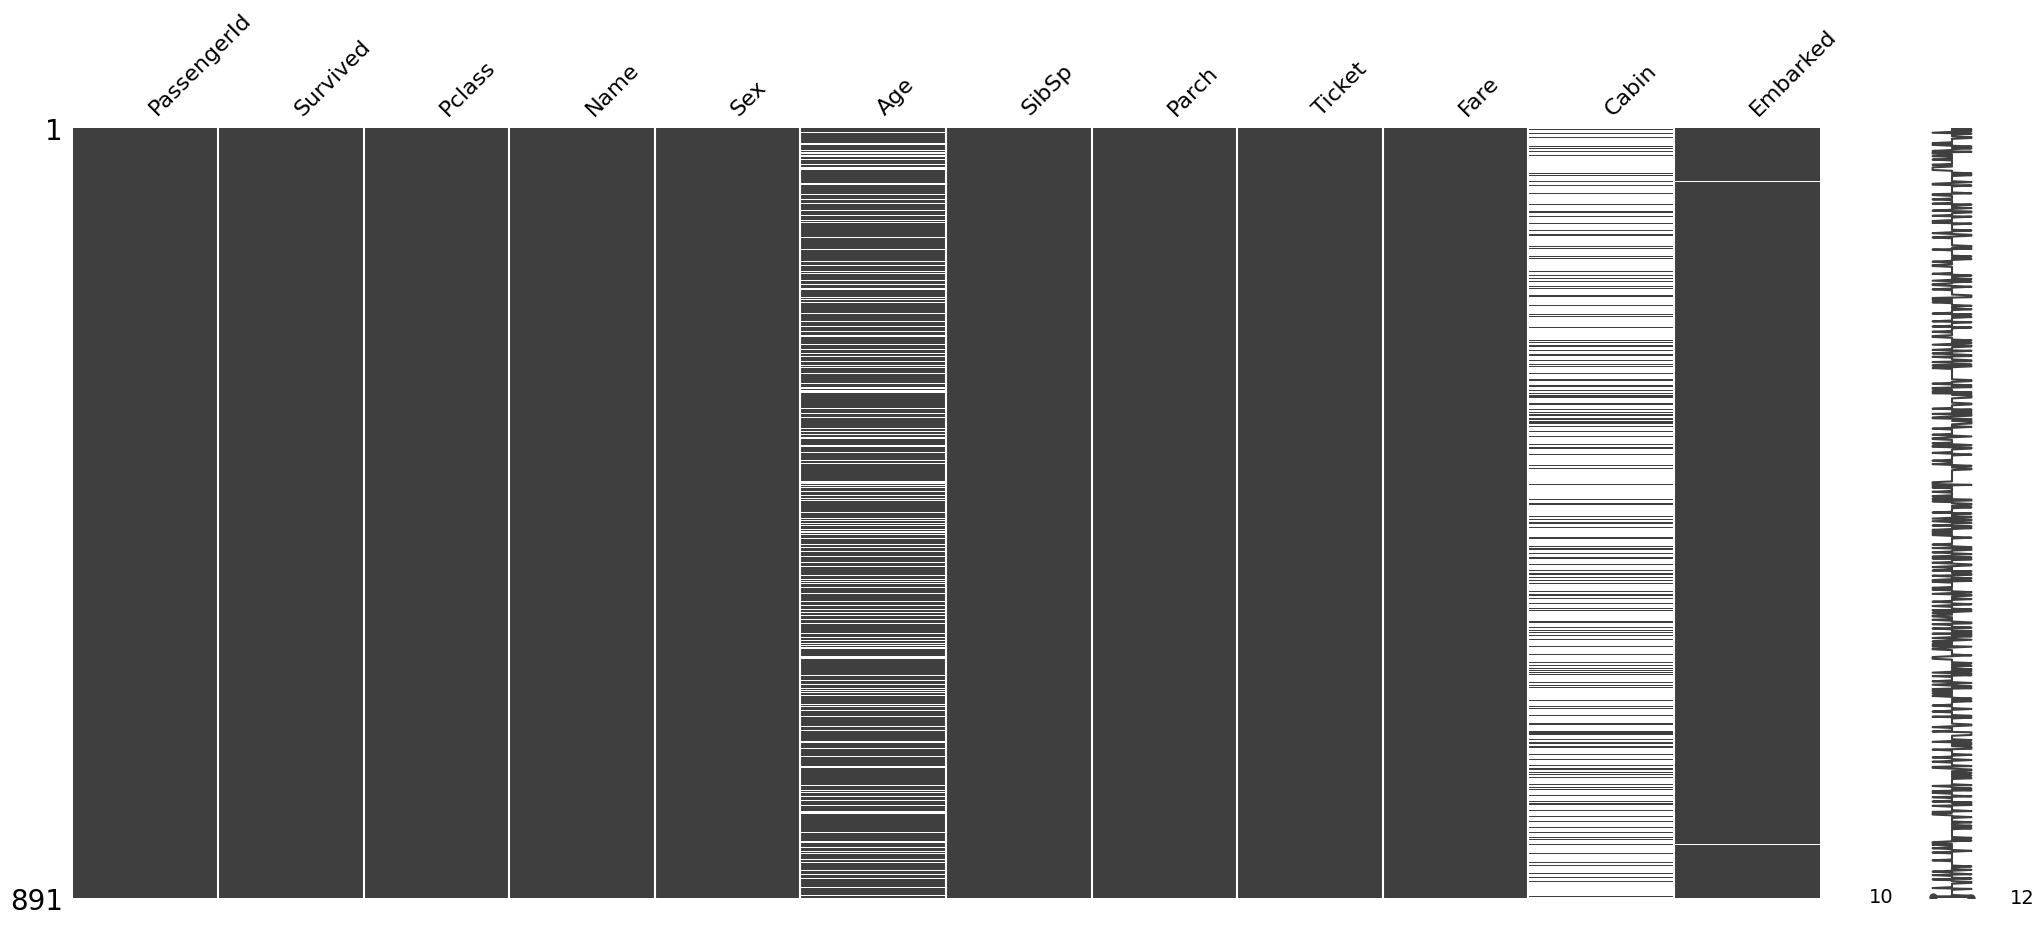

In [12]:
msno.matrix(df)

In [14]:
# msno.heatmap(df)

Now we identifies the corresponding column of dataframe , we need to deal with those value...  
we can do that by using the following way: 
1. Deletion
2. Fill with meaningful one
   

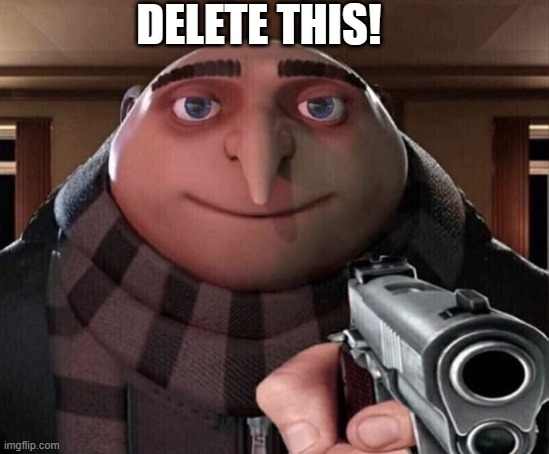
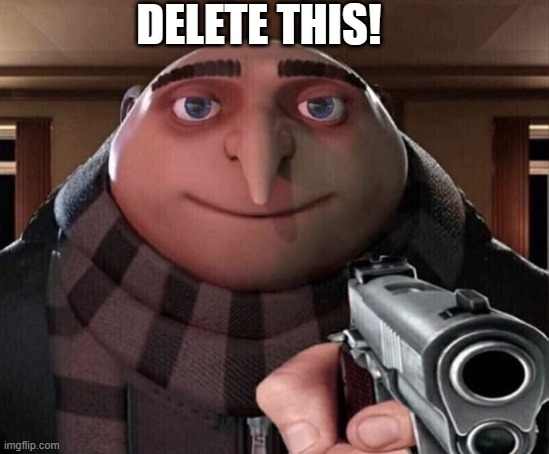

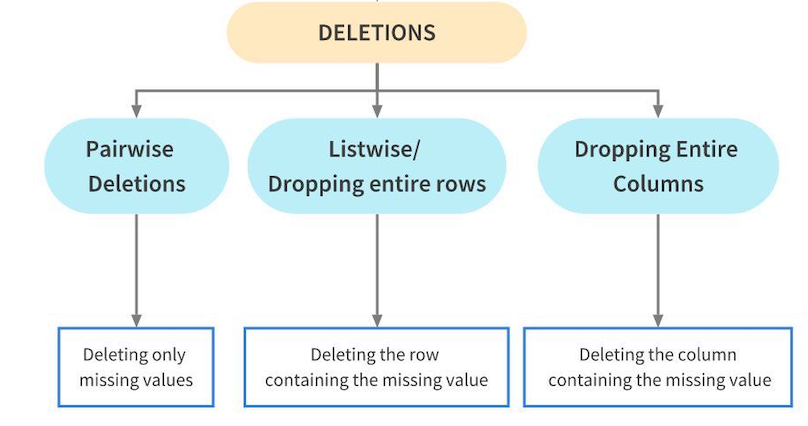
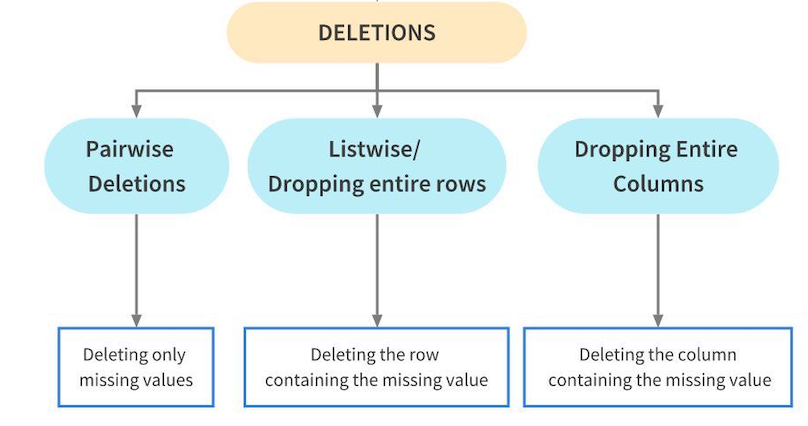

**Pairwise Deletion**
Parwise Deletion is used when values are missing completely at random i.e MCAR. During Pairwise deletion, only the missing values are deleted. All operations in pandas like mean,sum etc intrinsically skip missing values.

In [17]:
df['Age'].mean()

29.69911764705882

**Listwise Deletion/ Dropping colums**
During Listwise deletion, complete colums(which contain the missing values) are deleted. As a result, it is also called Complete Case deletion. Like Pairwise deletion, listwise deletions are also only used for MCAR values.

In [ ]:
df.dropna(subset=['Age'],inplace=True) 
# #With inplace=False (default):
# The function creates a new dataframe with the modifications, leaving the original dataframe unchanged.
# With inplace=True:
# The function modifies the original dataframe directly, without creating a copy.
df['Age'].isnull().sum()

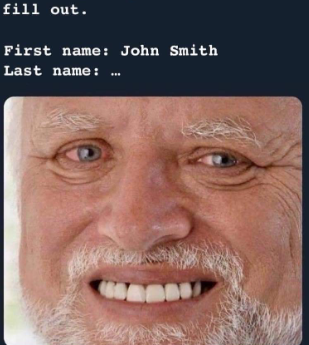
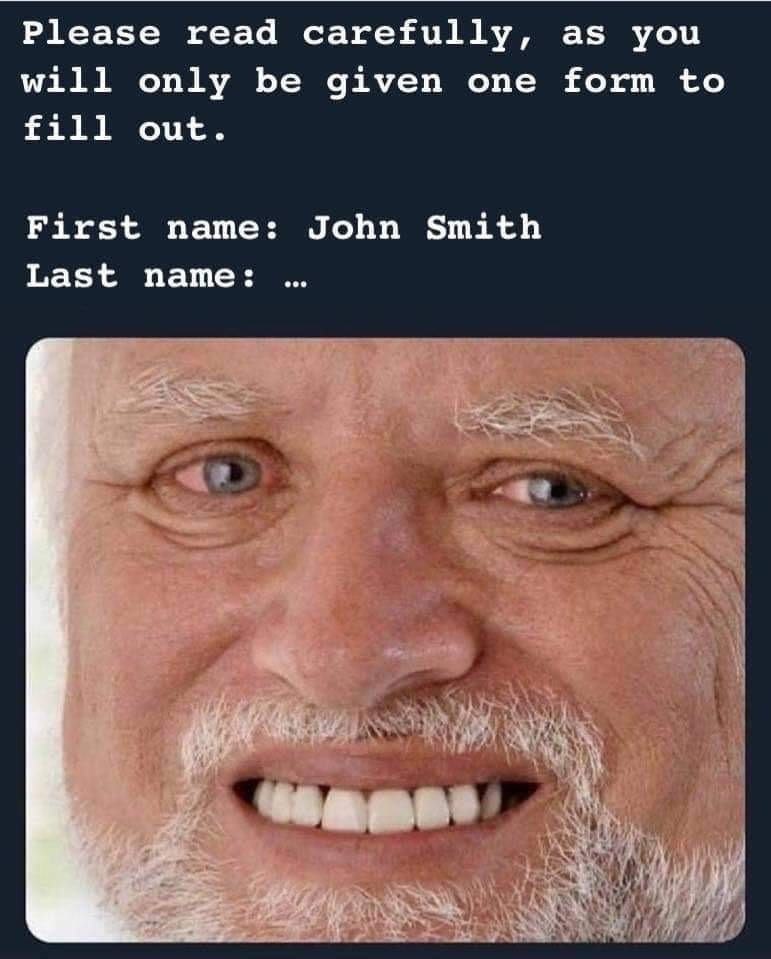
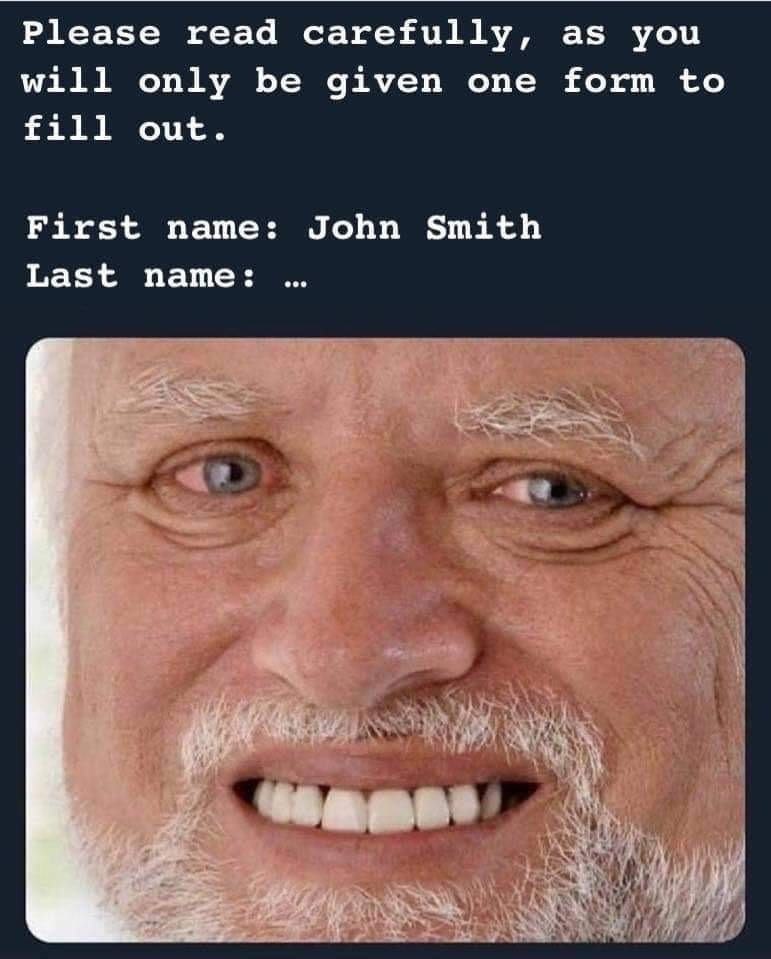
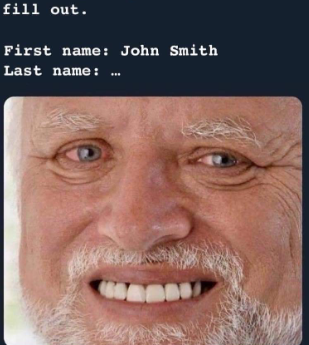

**Fill with meaningful one**

**type 1. Replacing NaN values with a Static value After replacing**

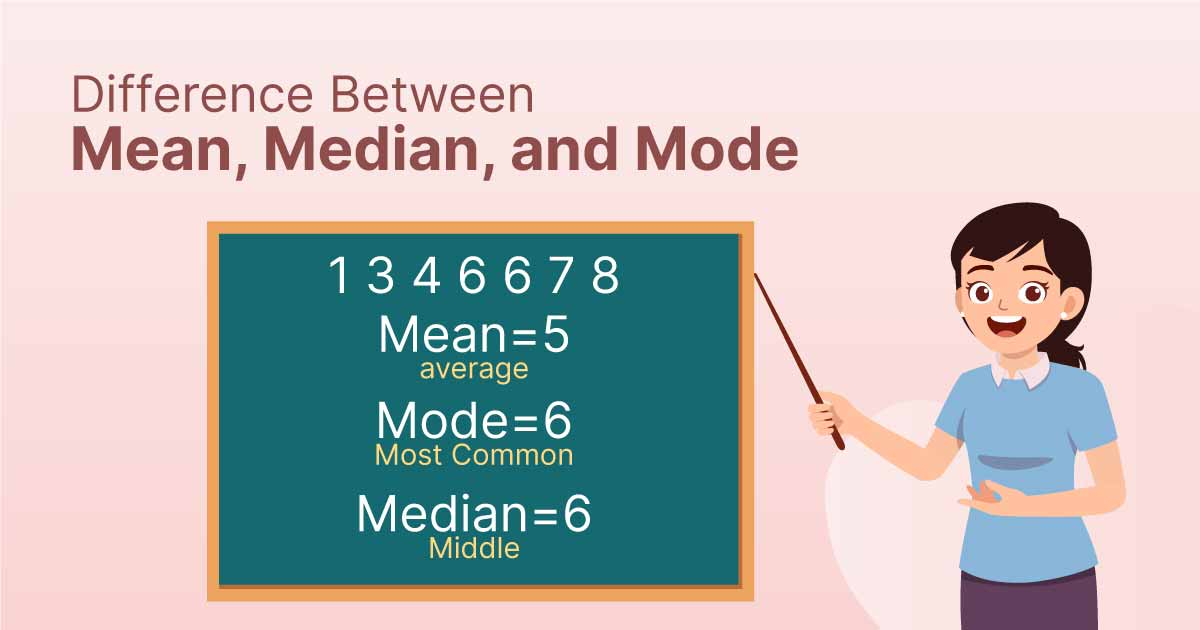
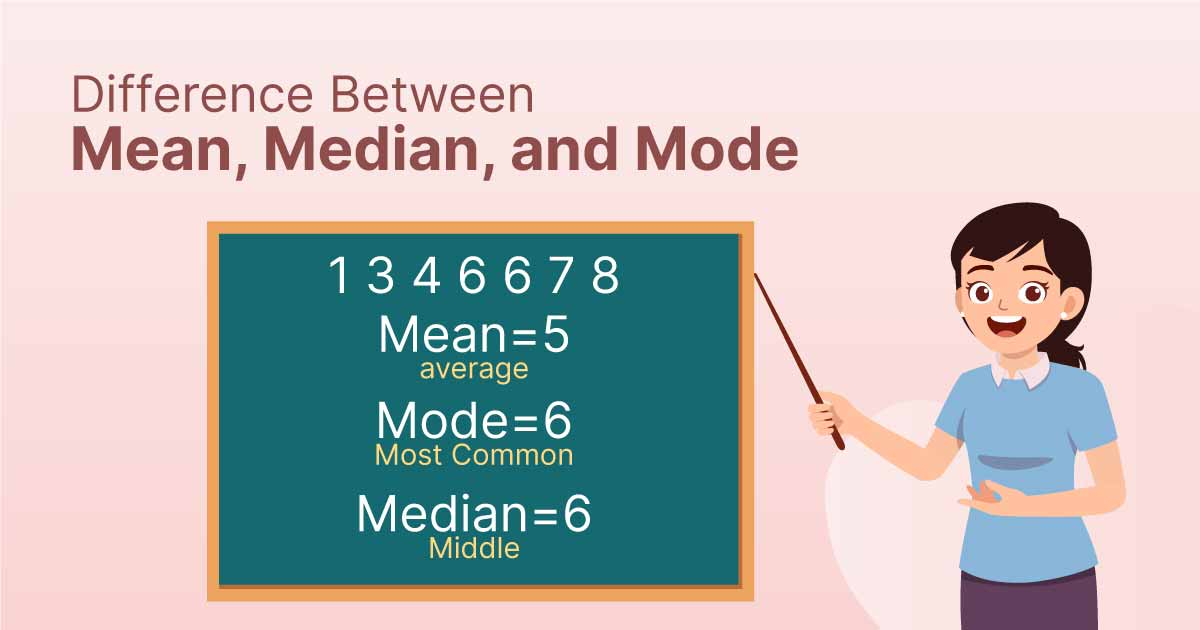

In [18]:
# importing pandas module
import pandas as pd

# replacing na values in college with No college
df["Age"].fillna(0, inplace = True)

df.isnull().sum()

<ipython-input-18-63c929c7f64f>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(0, inplace = True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)
#it will work only on numerical value either way can use mean, median

**type 2. Replacing Null Values Using method Parameter**
1. ffill
2. bfill

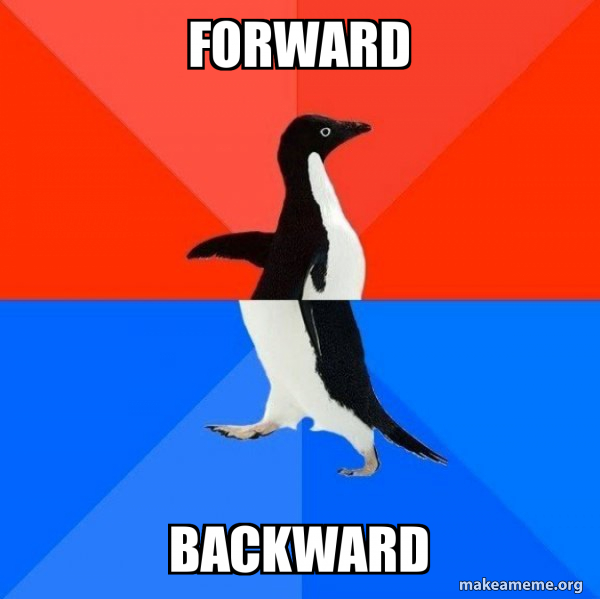
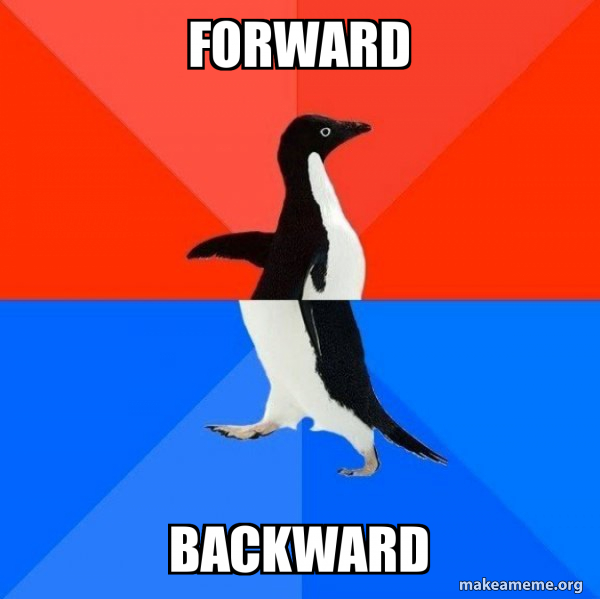

In [20]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
df['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [26]:
# df.isnull().sum()
# forward fill missing values
df_ffill = df['Age'].fillna(method='ffill')
print(df_ffill)
df_ffill.isnull().sum()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     0.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


<ipython-input-26-9093849eccbe>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df['Age'].fillna(method='ffill')


0

In [ ]:
# forward fill missing values
df_ffill = df['Cabin'].fillna(method='bfill')
# print(df_ffill)
df_ffill.isnull().sum()

<iframe src="https://www.kaggle.com/embed/parulpandey/a-guide-to-handling-missing-values-in-python?cellIds=38&kernelSessionId=38521662" height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto" title="A Guide to Handling Missing values in Python "></iframe>